#EDA
Think about if you are telling a story, or explaining your data to your grandma, and that you want them to have a comprehensive understanding when they read through your EDA. How would you structure your notebook?
Do it on Juptyer notebook, either locally or on cloud.
Make sure there is an explanation in Markdown between each cell block that you execute, they can be questions like:
what is that you found? why so?
What are the assumptions?
How would it impact my analysis and expectation?
What would happen to my model?
How can I make it better?
What should be my main metric? second metric? How should I expect them to work, and why?
etc.


In [136]:
#Import basic labraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import datetime
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
color = sns.color_palette()


In [163]:
#Read data
df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


on the weekly(try first)/daily(?) basis how many purchases customerID makes.Constant cadence of data. same lengh for each customer id. Where customer doesnt make a purchase we put zero. If customer doesnt make a purchase in a week, we can flag this customer as low value customer and we are not promote to this type of customer.

In [164]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [165]:
# change the invoice_date format - String to Timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [172]:
#data points that have missing customer id
df[df.CustomerID.isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [176]:
df[df.InvoiceNo==536544]['CustomerID'].unique().tolist()

[nan]

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Description and CustomerID columns contain.....

In [178]:
#shape of the data set
df.shape
print(f'The shape of the dataset is: {df.shape}')

The shape of the dataset is: (541909, 8)


In [179]:
#Duplicates
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df.shape)

(5268, 8)


In [180]:
# Dropping the duplicates 
df.drop_duplicates(inplace=True)

In [181]:
#count the number of rows before removing the data per variable
df.count() 

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

We have an even amount of data for InvoiceNo,StockCode, Quantity,InvoiceDate, UnitPrice, Country. We need check for missing data.

In [182]:
# Finding the null values.
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64


As expected, we have missing values in Description and CustomerID. We don't care about missing data in Description column, however, missing data in CustomerID has significant value, we cannot just drop it because it's almost 1/4 of the data set.

In [183]:
#Drop irrelevant columns: description -> requred extra work with classification may be we will use it later
df = df.drop('Description', 1)

In [184]:
df.count()

InvoiceNo      536641
StockCode      536641
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

<AxesSubplot:xlabel='Quantity'>

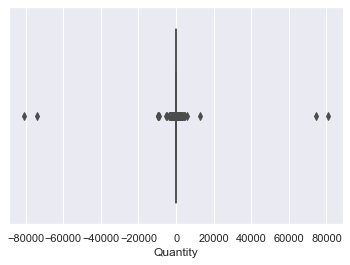

In [149]:
#check for outliers
sns.boxplot(x=df['Quantity'])

We assume that negative numbers are returned items. Should I just remove all negative?

<AxesSubplot:xlabel='UnitPrice'>

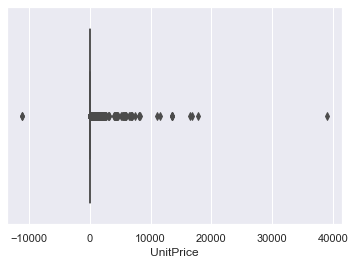

In [150]:
sns.boxplot(x=df['UnitPrice'])

We have lot's of freebies here.

In [151]:
print(max(df.UnitPrice))

38970.0


In [152]:
print(min(df.UnitPrice))

-11062.06


We have two clear outliers max -> 38970 and min -> -11062.06. We can remove outliers from the data set.

Check how many zero unit price we have...We are asuming that we will convert all negative values to zero. Calculate NET CLV
Extract negative values (returns) make absolute value -> make graph. How many returns made over the year? googness of fit. calculate the slope. On the course of two years i have a trend for returns.Trend of returns, what a potential coefficient that i can extrapolate to potential life time value. Does that make forecusting more realistic?
Fill out the customer id that can fit with invoice id...

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.001241,-0.003457
UnitPrice,-0.001241,1.000000,-0.004524
CustomerID,-0.003457,-0.004524,1.000000


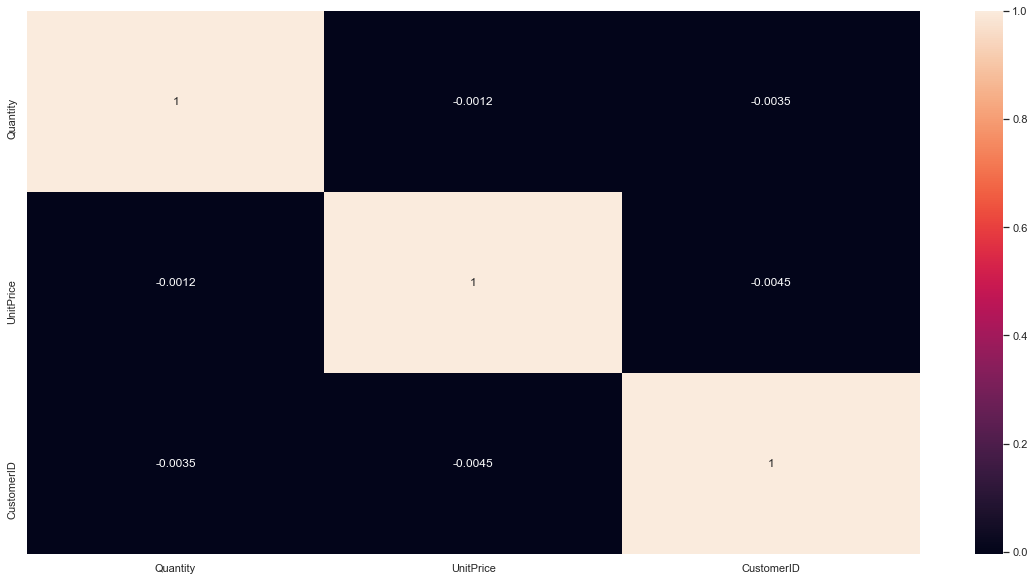

In [153]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,annot=True)
c

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


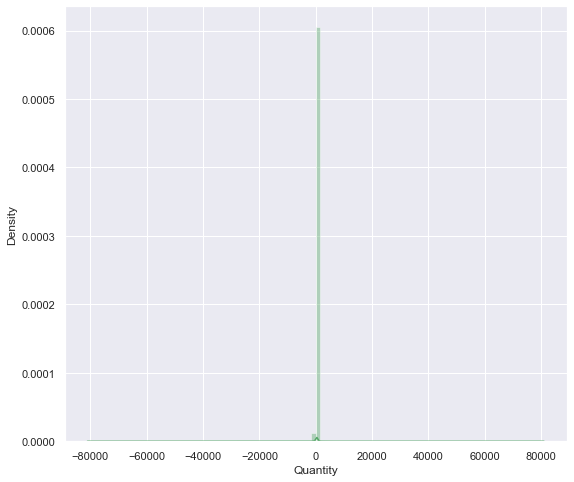

In [154]:
#Statistics of Quantity column
print(df['Quantity'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['Quantity'], color='g', bins=100, hist_kws={'alpha': 0.4});

Findings:
Quantity has negative values
Unit Price has zero values (FREE items?)

count    536641.000000
mean          4.632656
std          97.233118
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


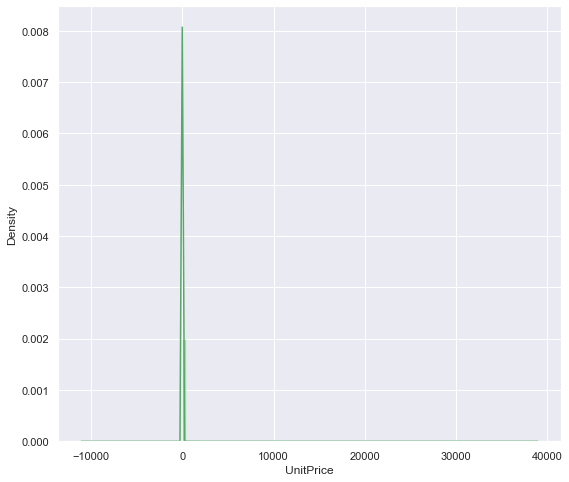

In [155]:
print(df['UnitPrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['UnitPrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

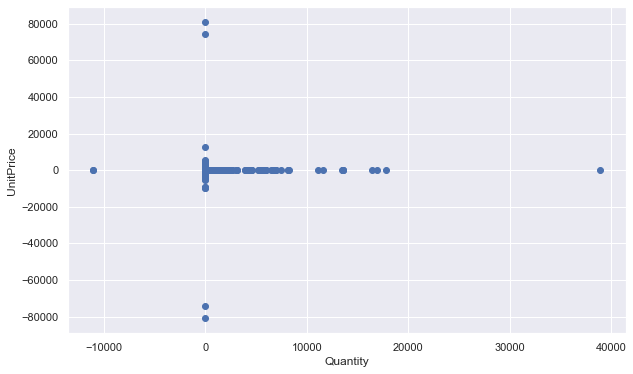

In [156]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['UnitPrice'], df['Quantity'])
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
plt.show()

In [157]:
#Create new features: Gross margine
df['TotalCost'] = df['UnitPrice']*df['Quantity']

In [109]:
df.head(5)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [110]:
#What countries
df['Country'].value_counts()

United Kingdom          490300
Germany                   9480
France                    8541
EIRE                      8184
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1994
Portugal                  1510
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Unspecified                442
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     294
USA                        291
Hong Kong                  284
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [111]:
#Most of the customers who made a purchase - from UK -> 490300.

In [ ]:
#How many orders per month
#How many orders per day
#How many orders per hour

In [ ]:
#Remove Quantity with negative values ????

In [112]:
# rearrange all the columns for easy reference
df = df[['CustomerID','InvoiceNo','InvoiceDate','StockCode','Quantity','UnitPrice','TotalCost','Country']]

In [113]:
df.head(5)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,TotalCost,Country
0,17850.0,536365,2010-12-01 08:26:00,85123A,6,2.55,15.30,United Kingdom
1,17850.0,536365,2010-12-01 08:26:00,71053,6,3.39,20.34,United Kingdom
2,17850.0,536365,2010-12-01 08:26:00,84406B,8,2.75,22.00,United Kingdom
3,17850.0,536365,2010-12-01 08:26:00,84029G,6,3.39,20.34,United Kingdom
4,17850.0,536365,2010-12-01 08:26:00,84029E,6,3.39,20.34,United Kingdom


In [114]:
#Add the columns - Month, Day and Hour for the invoice
df.insert(loc=2, column='year_month', value=df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df.insert(loc=3, column='month', value=df.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
df.insert(loc=4, column='day', value=(df.InvoiceDate.dt.dayofweek)+1)
df.insert(loc=5, column='hour', value=df.InvoiceDate.dt.hour)

In [115]:
df.head(5)

,CustomerID,InvoiceNo,year_month,month,day,hour,InvoiceDate,StockCode,Quantity,UnitPrice,TotalCost,Country
0,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,85123A,6,2.55,15.30,United Kingdom
1,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,71053,6,3.39,20.34,United Kingdom
2,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84406B,8,2.75,22.00,United Kingdom
3,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84029G,6,3.39,20.34,United Kingdom
4,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84029E,6,3.39,20.34,United Kingdom


In [117]:
#How many orders made by the customers?
orders = df.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

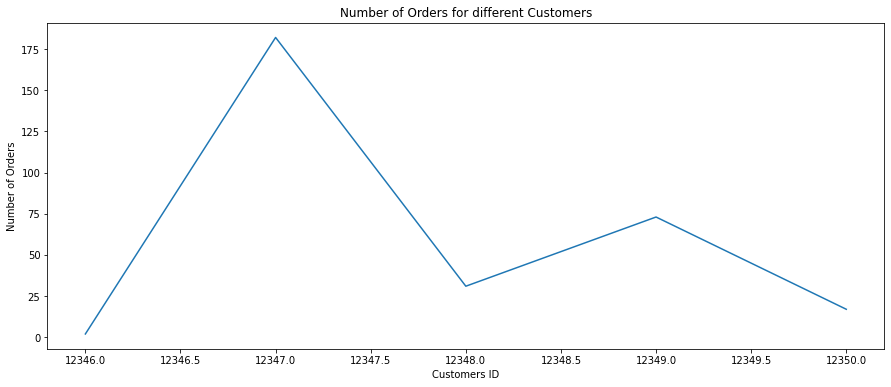

In [118]:
plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [119]:
#Top 5 with number of orders
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
1,12347.0,Iceland,182
3,12349.0,Italy,73
2,12348.0,Finland,31
4,12350.0,Norway,17
0,12346.0,United Kingdom,2


In [ ]:
#Surprisengly, the most valuable customer per purchase from Iceland (but i did not remove outliers yet...)

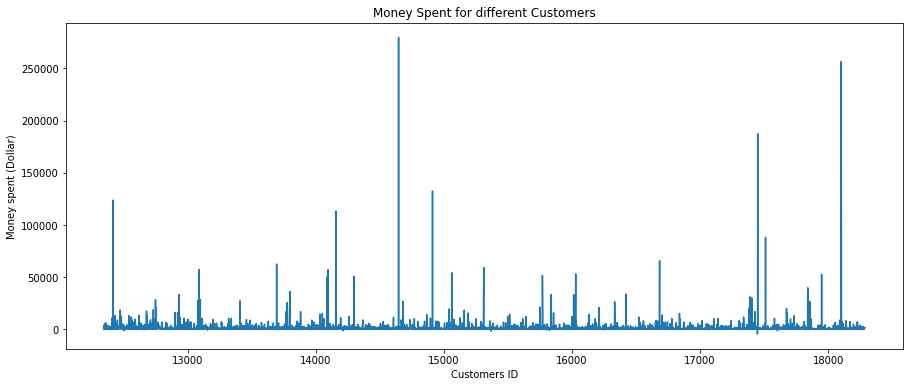

In [120]:
#How much money spent
money_spent = df.groupby(by=['CustomerID','Country'], as_index=False)['TotalCost'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.TotalCost)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [121]:
#Top amount spent
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='TotalCost', ascending=False).head()

The TOP 5 customers with highest money spent...


,CustomerID,Country,TotalCost
1711,14646.0,Netherlands,279489.02
4241,18102.0,United Kingdom,256438.49
3766,17450.0,United Kingdom,187322.17
1903,14911.0,EIRE,132458.73
57,12415.0,Australia,123725.45


In [124]:
#Let's remove quantity <0
df_new = df[df.Quantity > 0]

In [126]:
df_new.head()

,CustomerID,InvoiceNo,year_month,month,day,hour,InvoiceDate,StockCode,Quantity,UnitPrice,TotalCost,Country
0,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,85123A,6,2.55,15.30,United Kingdom
1,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,71053,6,3.39,20.34,United Kingdom
2,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84406B,8,2.75,22.00,United Kingdom
3,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84029G,6,3.39,20.34,United Kingdom
4,17850.0,536365,201012,12,3,8,2010-12-01 08:26:00,84029E,6,3.39,20.34,United Kingdom


In [128]:
df_new.describe()

,CustomerID,year_month,month,day,hour,Quantity,UnitPrice,TotalCost
count,392732.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000,526054.000000
mean,15287.734822,201099.721504,7.551879,3.428091,13.074633,10.730874,3.871747,20.188016
std,1713.567773,25.775412,3.508391,1.844960,2.442553,157.591838,42.016560,272.250300
min,12346.000000,201012.000000,1.000000,1.000000,6.000000,1.000000,-11062.060000,-11062.060000
25%,13955.000000,201103.000000,5.000000,2.000000,11.000000,1.000000,1.250000,3.900000
50%,15150.000000,201107.000000,8.000000,3.000000,13.000000,4.000000,2.080000,9.920000
75%,16791.000000,201110.000000,11.000000,5.000000,15.000000,11.000000,4.130000,17.700000
max,18287.000000,201112.000000,12.000000,7.000000,20.000000,80995.000000,13541.330000,168469.600000


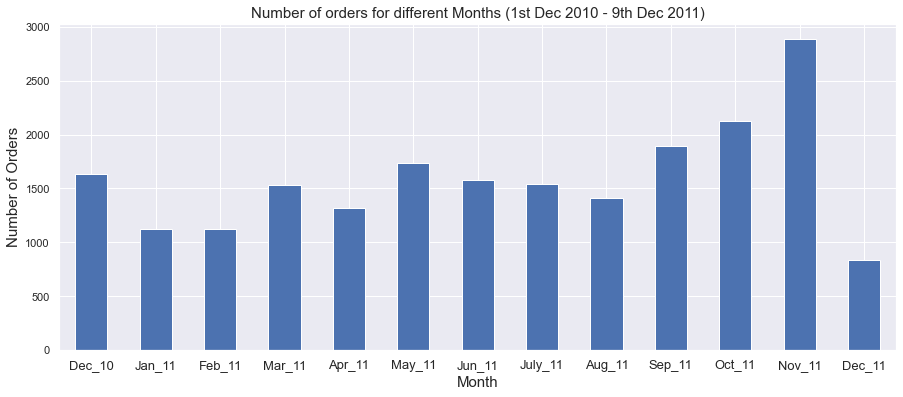

In [132]:
ax = df_new.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind ='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

,CustomerID,year_month,month,day,hour,Quantity,UnitPrice,TotalCost
CustomerID,1.000000,-0.032832,0.029641,0.019834,0.065788,-0.006210,-0.010790,-0.003892
year_month,-0.032832,1.000000,-0.249051,-0.001442,-0.008044,0.003467,-0.006847,0.000336
month,0.029641,-0.249051,1.000000,0.040746,0.026919,-0.002358,0.000200,0.000451
day,0.019834,-0.001442,0.040746,1.000000,-0.033215,-0.002392,-0.009164,-0.004604
hour,0.065788,-0.008044,0.026919,-0.033215,1.000000,-0.018536,0.003354,-0.015697
Quantity,-0.006210,0.003467,-0.002358,-0.002392,-0.018536,1.000000,-0.003226,0.895957
UnitPrice,-0.010790,-0.006847,0.000200,-0.009164,0.003354,-0.003226,1.000000,0.158283
TotalCost,-0.003892,0.000336,0.000451,-0.004604,-0.015697,0.895957,0.158283,1.000000


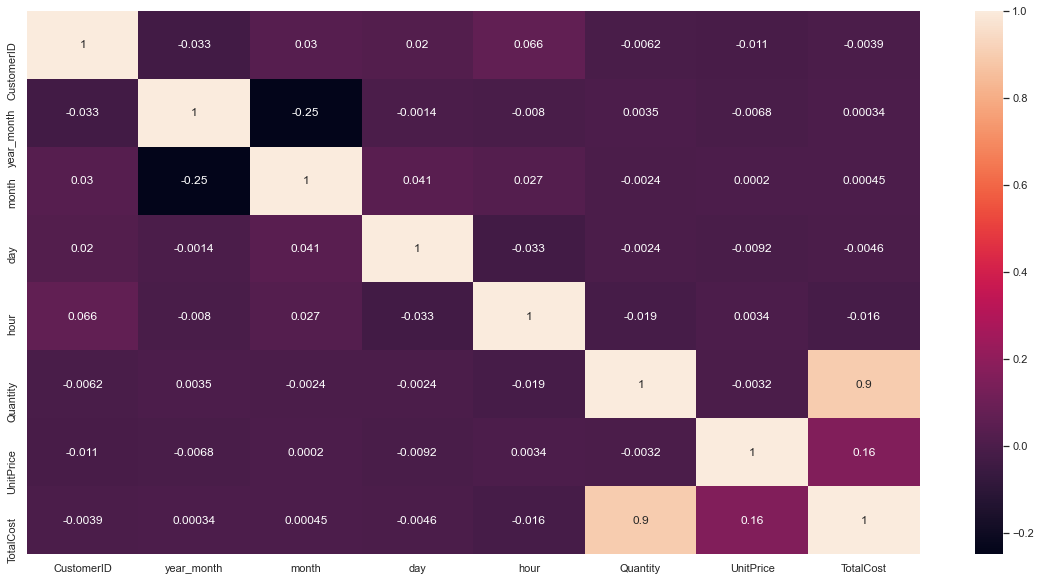

In [134]:
plt.figure(figsize=(20,10))
c2= df_new.corr()
sns.heatmap(c2,annot=True)
c2

In [ ]:
#Customer segmentation?
#Calculate Recency, Frequency and Monetary Value
#Av order value
#Av purchase frequiency 
#Customer lifespan
#Churn rate


In [ ]:
total cost, invoice, customer id:
DeepAR
CNN-QR
LSTM
prophet